In [53]:
# Goal: from an image and a set of pascal VOC files, get the image annotated with the corresponding bounding boxes.
# Make the bboxes appear on the image and save the file.

In [1]:
import xml.etree.ElementTree as ET

def read_pascal_voc(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        single_box_dico = {"xmin": xmin, "ymin": ymin, "xmax": xmax, "ymax": ymax}
        list_with_all_boxes.append(single_box_dico)

    return filename, list_with_all_boxes

name, boxes = read_pascal_voc("./tests/2007_000027.xml")
print(name)
print(boxes)

2007_000027.jpg
[{'xmin': 174, 'ymin': 101, 'xmax': 349, 'ymax': 351}]


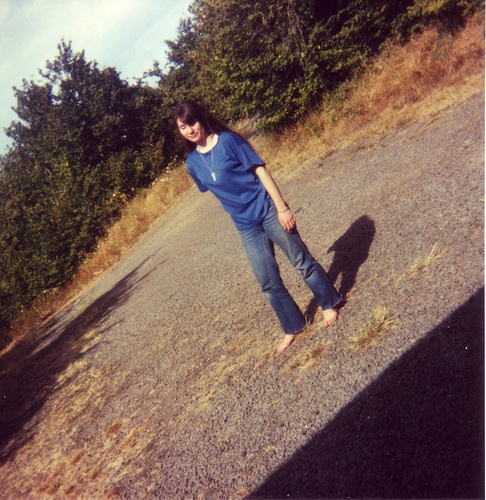

In [12]:
#from IPython.display import Image, display
import IPython.display as disp # Image from IPython MUST be called as disp.Image, else there's confusion with the PIL Image module!
from PIL import Image, ImageDraw

disp.display(disp.Image(filename='./tests/2007_000027.jpg'))

def bbox(image_path, output_path, bboxes):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    for bbox in bboxes:
        rect = [(bbox['xmin'], bbox['ymin']), (bbox['xmax'], bbox['ymax'])]
        draw.rectangle(rect, outline='red')
    image.save(output_path)

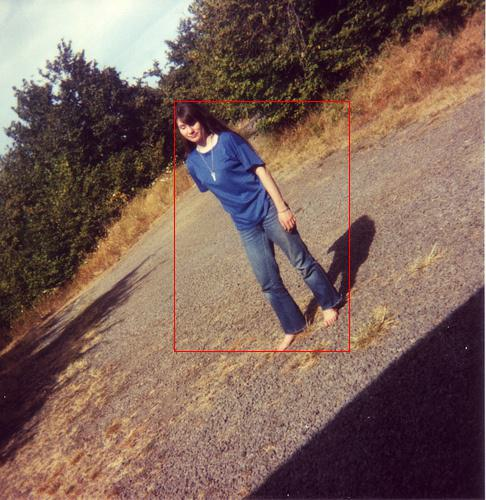

In [13]:
bbox("./tests/2007_000027.jpg", "./tests/bbox_test.jpg", boxes)
disp.display(disp.Image(filename='./tests/bbox_test.jpg'))

In [4]:
# This version takes both the xml and image file names as input
def process_bounding_boxes(xml_path, image_path, output_path):
    name, boxes = read_pascal_voc(xml_path)
    bbox(image_path, output_path, boxes)

In [9]:
# This version takes only the xml file name as input, and finds the image file name from the xml (they should be the same? Will it work with the model?)
# TODO: fix the following issue: this doesn't work if the xml is located in a sub-directory
# because the filename extraction doesn't take directories into account
def process_bounding_boxes_xml_only(xml_path, output_path):
    image_path, boxes = read_pascal_voc(xml_path)
    bbox(image_path, output_path, boxes)

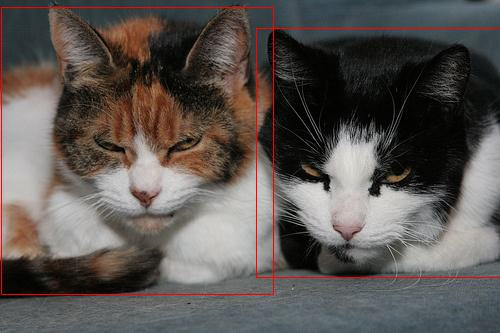

In [10]:
# test 2
process_bounding_boxes("./tests/2007_002760.xml", "./tests/2007_002760.jpg", "./tests/CATS.jpg")

disp.display(disp.Image(filename='./tests/CATS.jpg'))

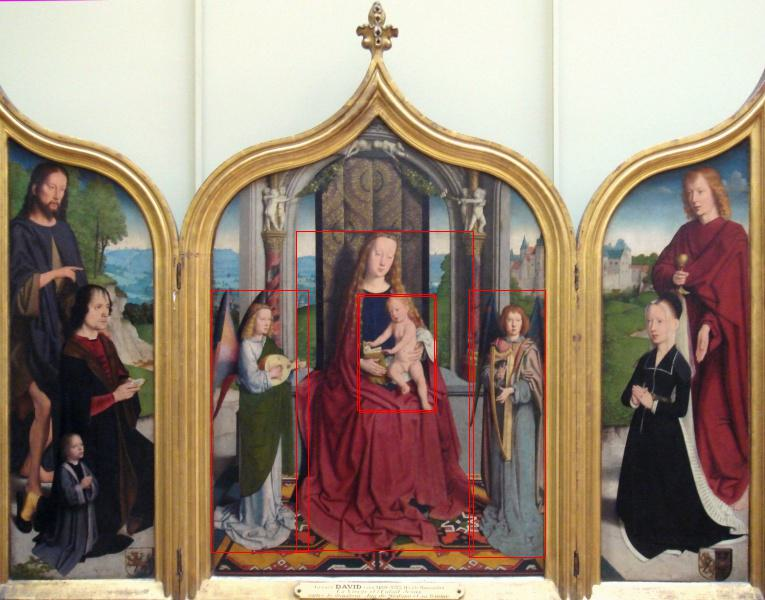

In [14]:
process_bounding_boxes("./Q23898.xml", "./Q23898.jpg", "./tests/religious.jpg")

disp.display(disp.Image(filename='./tests/religious.jpg'))